###Loading Library

In [120]:
# pandas
import pandas as pd

# numpy
import numpy as np

# defaultcit
from collections import defaultdict

# plot with folium
import folium
from IPython.core.display import HTML

# parsing time
from datetime import datetime, timedelta

# plotting with matplotlib
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# plotting with pylab
import pylab as P

# Clustering
from sklearn.cluster import MiniBatchKMeans, KMeans
import time
import json

# change prediction categories into labels
from sklearn import preprocessing
from sklearn import cross_validation 
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

###Loading Training/Testing Data

In [63]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
train_df = train_df.sample(n = 100000, random_state = 666)

In [64]:
train_df = pd.DataFrame(train_df)
train_df = train_df.reset_index(drop=True)
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-04-02 13:00:00,ASSAULT,THREATS AGAINST LIFE,Wednesday,PARK,NONE,500 Block of CORBETT AV,-122.444182,37.757346
1,2011-12-15 16:15:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Thursday,CENTRAL,NONE,300 Block of BAY ST,-122.412804,37.805774
2,2015-03-04 01:55:00,LARCENY/THEFT,GRAND THEFT FROM PERSON,Wednesday,MISSION,NONE,400 Block of CASTRO ST,-122.435150,37.761760
3,2008-08-19 22:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,2000 Block of WASHINGTON ST,-122.427007,37.792582
4,2014-04-16 12:58:00,DRUG/NARCOTIC,SALE OF BASE/ROCK COCAINE,Wednesday,TENDERLOIN,"ARREST, BOOKED",TURK ST / HYDE ST,-122.415695,37.782585


In [65]:
#Look at the shape
train_df.shape

(100000, 9)

In [66]:
train_df.columns, train_df.dtypes

(Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
        'Resolution', 'Address', 'X', 'Y'],
       dtype='object'), Dates          object
 Category       object
 Descript       object
 DayOfWeek      object
 PdDistrict     object
 Resolution     object
 Address        object
 X             float64
 Y             float64
 dtype: object)

In [113]:
#Listing Unique values for columns
pd.unique(train_df.PdDistrict.ravel()), pd.unique(train_df.DayOfWeek.ravel()), pd.unique(train_df.Category.ravel()),\
pd.unique(train_df.Resolution .ravel())
#pd.unique(train_df.hour_of_day.ravel())

(array(['PARK', 'CENTRAL', 'MISSION', 'NORTHERN', 'TENDERLOIN', 'INGLESIDE',
        'TARAVAL', 'SOUTHERN', 'BAYVIEW', 'RICHMOND'], dtype=object),
 array(['Wednesday', 'Thursday', 'Tuesday', 'Friday', 'Saturday', 'Monday',
        'Sunday'], dtype=object),
 array(['ASSAULT', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'VEHICLE THEFT',
        'ROBBERY', 'WARRANTS', 'BURGLARY', 'SEX OFFENSES FORCIBLE',
        'VANDALISM', 'OTHER OFFENSES', 'PROSTITUTION', 'NON-CRIMINAL',
        'MISSING PERSON', 'TRESPASS', 'SUSPICIOUS OCC', 'WEAPON LAWS',
        'FORGERY/COUNTERFEITING', 'FRAUD', 'DISORDERLY CONDUCT',
        'SEX OFFENSES NON FORCIBLE', 'SECONDARY CODES',
        'DRIVING UNDER THE INFLUENCE', 'DRUNKENNESS', 'RUNAWAY', 'GAMBLING',
        'RECOVERED VEHICLE', 'STOLEN PROPERTY', 'LOITERING', 'KIDNAPPING',
        'EMBEZZLEMENT', 'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS',
        'BAD CHECKS', 'BRIBERY', 'SUICIDE', 'EXTORTION',
        'PORNOGRAPHY/OBSCENE MAT', 'TREA'], dtype=object),
 array(

In [68]:
# dtDate = datetime.strptime("07-27-2012","%m-%d-%Y")
datetime.strptime('2015-05-13 23:53:00', "%Y-%m-%d %H:%M:%S")

datetime.datetime(2015, 5, 13, 23, 53)

###Getting Month of Year, Day of Month, Hour of Day, and Minute of Hour

In [69]:
type(train_df.Dates.values[0])
month_of_year = []
day_of_month =[]
hour_of_day =[]
min_of_hour =[]
for i in range(len(train_df.Dates.values)):
#     print(i)
    moy = datetime.strptime(train_df.Dates.values[i], "%Y-%m-%d %H:%M:%S").month
    dom = datetime.strptime(train_df.Dates.values[i], "%Y-%m-%d %H:%M:%S").day
    hod = datetime.strptime(train_df.Dates.values[i], "%Y-%m-%d %H:%M:%S").hour
    moh = datetime.strptime(train_df.Dates.values[i], "%Y-%m-%d %H:%M:%S").minute
    month_of_year.append(moy)
    day_of_month.append(dom)
    hour_of_day.append(hod)
    min_of_hour.append(moh)
train_df['month_of_year'] = temp
train_df['day_of_month'] = temp1
train_df['hour_of_day'] = temp2
train_df['min_of_hour'] = temp3

###Creating Weekday/Weekend Column

In [70]:
train_df['WeekdayWeeekend'] = train_df['DayOfWeek'].map( {'Monday': 'Weekday', 'Tuesday': 'Weekday', \
                                                          'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday',\
                                                         'Saturday': 'Weekend', 'Sunday': 'Weekend'} ).astype(object)

### Creating Midnight/Morning/Afternoon/Night Column

In [114]:
train_df['TimeOfDay'] = train_df['hour_of_day'].map({0: 'Midnight', 1: 'Midnight', 2:'Midnight', 3:'Midnight', 4:'Midnight', \
                                                     5:'Midnight', 6:'Morning', 7:'Morning', 8:'Morning', 9:'Morning', \
                                                     10:'Morning', 11:'Morning', 12:'Afternoon', 13:'Afternoon', 14:'Afternoon', \
                                                     15:'Afternoon', 16:'Afternoon', 17:'Afternoon', 18:'Night', 19:'Night', \
                                                     20:'Night', 21:'Night', 22:'Night', 23:'Night'}).astype(object)

###Creating Season Column

In [116]:
train_df['Season'] = train_df['month_of_year'].map({1: 'Winter', 2: 'Winter', 3:'Spring', 4:'Spring', 5:'Spring', \
                                                     6:'Spring', 7:'Summer', 8:'Summer', 9:'Summer', 10:'Autumn', \
                                                     11:'Autumn', 12:'Winter'}).astype(object)

In [117]:
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month_of_year,day_of_month,hour_of_day,min_of_hour,WeekdayWeeekend,TimeOfDay,Season
0,2003-04-02 13:00:00,ASSAULT,THREATS AGAINST LIFE,Wednesday,PARK,NONE,500 Block of CORBETT AV,-122.444182,37.757346,4,2,13,0,Weekday,Afternoon,Spring
1,2011-12-15 16:15:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Thursday,CENTRAL,NONE,300 Block of BAY ST,-122.412804,37.805774,12,15,16,15,Weekday,Afternoon,Winter
2,2015-03-04 01:55:00,LARCENY/THEFT,GRAND THEFT FROM PERSON,Wednesday,MISSION,NONE,400 Block of CASTRO ST,-122.435150,37.761760,3,4,1,55,Weekday,Midnight,Spring
3,2008-08-19 22:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,2000 Block of WASHINGTON ST,-122.427007,37.792582,8,19,22,0,Weekday,Night,Summer
4,2014-04-16 12:58:00,DRUG/NARCOTIC,SALE OF BASE/ROCK COCAINE,Wednesday,TENDERLOIN,"ARREST, BOOKED",TURK ST / HYDE ST,-122.415695,37.782585,4,16,12,58,Weekday,Afternoon,Spring


###Some Basic Visual just to look at the data

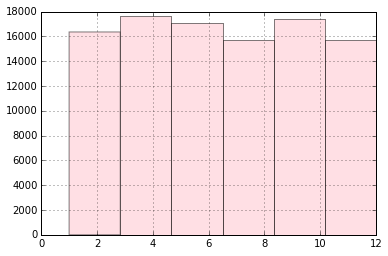

In [184]:
train_df['month_of_year'].hist(color = 'pink', alpha = .5, bins = 6, range = (1,12))
P.show()

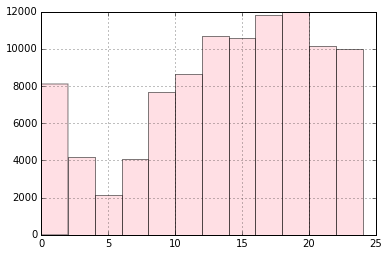

In [183]:
train_df['hour_of_day'].hist(color = 'pink', alpha = .5, bins = 12, range = (0,24))
P.show()

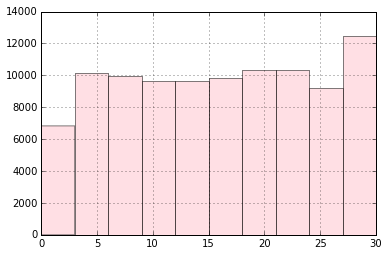

In [182]:
train_df['day_of_month'].hist(color = 'pink', alpha = .5, bins = 10, range = (0,30))
P.show()

### Creating new data frame to get all new features

In [185]:
WeekdayWeekend_dummies = pd.get_dummies(train_df.WeekdayWeeekend)
TimeOfDay_dummies = pd.get_dummies(train_df.TimeOfDay)
season_dummies = pd.get_dummies(train_df.Season)
district_dummies = pd.get_dummies(train_df.PdDistrict)

train_df_new = pd.concat([train_df, WeekdayWeekend_dummies, TimeOfDay_dummies, season_dummies, district_dummies], axis=1, join_axes=[train_df.index])
print(train_df.shape)
print(WeekdayWeekend_dummies.shape)
print(TimeOfDay_dummies.shape)
print(season_dummies.shape)
print(district_dummies.shape)
print(train_df_new.shape)

(100000, 16)
(100000, 2)
(100000, 4)
(100000, 4)
(100000, 10)
(100000, 36)


In [187]:
le_crime = preprocessing.LabelEncoder()
crime = le_crime.fit_transform(train_df_new.Category)
train_df_new['dummy_Category'] = crime
train_df_new.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month_of_year,...,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,dummy_Category
0,2003-04-02 13:00:00,ASSAULT,THREATS AGAINST LIFE,Wednesday,PARK,NONE,500 Block of CORBETT AV,-122.444182,37.757346,4,...,0,0,0,0,1,0,0,0,0,1
1,2011-12-15 16:15:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Thursday,CENTRAL,NONE,300 Block of BAY ST,-122.412804,37.805774,12,...,1,0,0,0,0,0,0,0,0,16
2,2015-03-04 01:55:00,LARCENY/THEFT,GRAND THEFT FROM PERSON,Wednesday,MISSION,NONE,400 Block of CASTRO ST,-122.435150,37.761760,3,...,0,0,1,0,0,0,0,0,0,16
3,2008-08-19 22:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,2000 Block of WASHINGTON ST,-122.427007,37.792582,8,...,0,0,0,1,0,0,0,0,0,16
4,2014-04-16 12:58:00,DRUG/NARCOTIC,SALE OF BASE/ROCK COCAINE,Wednesday,TENDERLOIN,"ARREST, BOOKED",TURK ST / HYDE ST,-122.415695,37.782585,4,...,0,0,0,0,0,0,0,0,1,7


In [188]:
len(raw_sfpd.Category.unique())

39

In [10]:
categories = list(raw_sfpd.Category.unique())
print(categories)

['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT', 'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS', 'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS', 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY', 'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD', 'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE', 'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT', 'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY', 'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT']


In [197]:
# counts = dict()
# for i in items:
#   counts[i] = counts.get(i, 0) + 1
categories_dict = defaultdict(int)
for item in train_df_new.Category:
    categories_dict[item] += 1
    
(sorted(categories_dict.items(), key=lambda x: x[1], reverse=True))

[('LARCENY/THEFT', 19997),
 ('OTHER OFFENSES', 14517),
 ('NON-CRIMINAL', 10513),
 ('ASSAULT', 8849),
 ('DRUG/NARCOTIC', 6010),
 ('VEHICLE THEFT', 5983),
 ('VANDALISM', 5001),
 ('WARRANTS', 4848),
 ('BURGLARY', 4262),
 ('SUSPICIOUS OCC', 3587),
 ('MISSING PERSON', 2950),
 ('ROBBERY', 2549),
 ('FRAUD', 1873),
 ('FORGERY/COUNTERFEITING', 1203),
 ('SECONDARY CODES', 1093),
 ('WEAPON LAWS', 982),
 ('PROSTITUTION', 863),
 ('TRESPASS', 821),
 ('SEX OFFENSES FORCIBLE', 558),
 ('STOLEN PROPERTY', 525),
 ('DISORDERLY CONDUCT', 511),
 ('DRUNKENNESS', 481),
 ('RECOVERED VEHICLE', 350),
 ('KIDNAPPING', 281),
 ('DRIVING UNDER THE INFLUENCE', 275),
 ('RUNAWAY', 222),
 ('LIQUOR LAWS', 222),
 ('ARSON', 161),
 ('LOITERING', 130),
 ('EMBEZZLEMENT', 128),
 ('SUICIDE', 67),
 ('FAMILY OFFENSES', 55),
 ('BAD CHECKS', 44),
 ('EXTORTION', 28),
 ('BRIBERY', 27),
 ('GAMBLING', 19),
 ('SEX OFFENSES NON FORCIBLE', 12),
 ('PORNOGRAPHY/OBSCENE MAT', 2),
 ('TREA', 1)]

In [12]:
# felonies_category = ['LARCENY/THEFT','ASSAULT','VEHICLE THEFT','DRUG/NARCOTIC',]

# misdemeanors = []

# infrac_wobblers = ['OTHER OFFENSES','NON-CRIMINAL',]

In [189]:
def inline_map(m, width=650, height=500):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{}" '
                 'style="width: {}px; height: {}px; '
                 'border: none"></iframe>'.format(srcdoc, width, height))
    return embed

In [190]:
# testing base map
width, height = 750, 450
taxi_loc = folium.Map(location=[37.759953, -122.44147], zoom_start=12,
                    tiles='OpenStreetMap', width=width, height=height)

# for c,e in zip(clustering_end2.cluster_centers_, end_normalized):
#     taxi_loc.circle_marker(location=(c[0],c[1]), radius=(300 * (e + 0.3)), line_color=None, fill_color='red', fill_opacity=0.5)

# for c,s in zip(clustering_start2.cluster_centers_, start_normalized):
#     taxi_loc.circle_marker(location=(c[0],c[1]), radius=(300 * (s + 0.3)), line_color=None, fill_color='white', fill_opacity=0.9)

# taxi_loc.geo_json(geo_path='TAZ.geojson', fill_opacity=0.2, line_opacity=0.2)
    
inline_map(taxi_loc, width, height)

In [15]:
# plot using matplotlib

In [199]:
matplotlib.style.use('ggplot')

In [198]:
categories_dict

defaultdict(<class 'int'>, {'VANDALISM': 5001, 'GAMBLING': 19, 'STOLEN PROPERTY': 525, 'RUNAWAY': 222, 'TREA': 1, 'WARRANTS': 4848, 'SEX OFFENSES FORCIBLE': 558, 'SECONDARY CODES': 1093, 'SEX OFFENSES NON FORCIBLE': 12, 'DRUNKENNESS': 481, 'LARCENY/THEFT': 19997, 'ASSAULT': 8849, 'MISSING PERSON': 2950, 'SUSPICIOUS OCC': 3587, 'VEHICLE THEFT': 5983, 'DRUG/NARCOTIC': 6010, 'PORNOGRAPHY/OBSCENE MAT': 2, 'ARSON': 161, 'NON-CRIMINAL': 10513, 'EXTORTION': 28, 'LIQUOR LAWS': 222, 'BRIBERY': 27, 'BURGLARY': 4262, 'FRAUD': 1873, 'DRIVING UNDER THE INFLUENCE': 275, 'ROBBERY': 2549, 'WEAPON LAWS': 982, 'EMBEZZLEMENT': 128, 'TRESPASS': 821, 'KIDNAPPING': 281, 'FAMILY OFFENSES': 55, 'LOITERING': 130, 'BAD CHECKS': 44, 'DISORDERLY CONDUCT': 511, 'RECOVERED VEHICLE': 350, 'SUICIDE': 67, 'PROSTITUTION': 863, 'FORGERY/COUNTERFEITING': 1203, 'OTHER OFFENSES': 14517})

In [18]:
# # df.plot.barh(raw_sfpd)

# plt.figure(figsize=(15,5))

# # population_counties = sorted(population_counties, key=lambda tup:tup[1])

# # counties_list = [county[0] for county in population_counties]
# # per_capita_pop = [pop[1] for pop in population_counties]

# N = len(categories_dict.items())

# # counties_list = [county[0] for county in population_counties]
# # per_capita_pop = [pop[1] for pop in population_counties]

# ind = np.arange(N)  # the x locations for the groups
# width = 0.5       # the width of the bars

# #fig, ax = plt.subplots()
# rects1 = plt.bar(ind, categories_dict.values(), width=width, color='r')

# # plt.xticks(N + width, ('A', 'B', 'C', 'D', 'E'))
# plt.xticks(range(N), list(categories_dict.keys(), rotation=90)

# plt.show()

### Static Map ###

In [200]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)

# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


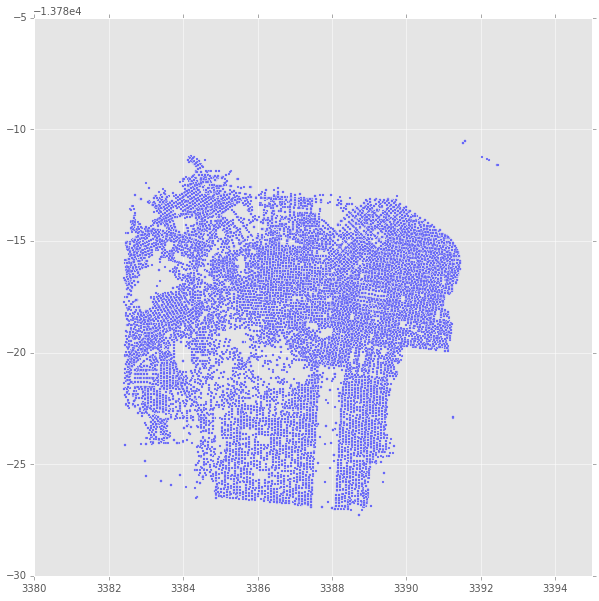

In [201]:
# change into meters
# pair_coordinates = [[item[0]*89.7, item[1]*112.7] for item in pair_coordinates]
# create scater plot
lat = train_df_new.Y*89.7
long = train_df_new.X*112.7
category_cluster = train_df_new.Category
# set axes range
plt.xlim(3380, 3395)
plt.ylim(-13810, -13785)
plt.scatter(lat, long, marker=u'.')

### Apply Mini Batch ###

** first, zip lat and long into list for clustering **

In [202]:
pair_coordinates = list(zip(lat,long))
# lat = raw_sfpd.Y*89.7
# long = raw_sfpd.X*112.7
pair_coordinates[:2]

[(3386.8339002919597, -13799.45930667832),
 (3391.1779266849935, -13795.922982963099)]

** two functions **
* mbk_time only outputs time... to find optimal batch size given cluster size 3 in the example
* optimal_mbk_time uses optimal batch size and cluster to output desired variables

In [203]:
# create mini batch function that takes clustersize and batchsize as parameters
def mbk_time(cluster_size, batch_size):
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=cluster_size, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
    t0 = time.time()
    mbk.fit(pair_coordinates)
    t_mini_batch = time.time() - t0
    return t_mini_batch

# create mini batch function that takes clustersize and batchsize as parameters
def optimal_mbk_time(cluster_size, batch_size):
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=cluster_size, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
    t0 = time.time()
    mbk.fit(pair_coordinates)
    t_mini_batch = time.time() - t0
    mbk_means_labels = mbk.labels_
    mbk_means_cluster_centers = mbk.cluster_centers_
    mbk_means_labels_unique = np.unique(mbk_means_labels)
    return t_mini_batch, mbk_means_labels, mbk_means_cluster_centers, mbk_means_labels_unique

** find optimal cluster size by using for loop **

In [204]:
mbk_means_batch = []
x = 100
while x < 10000:
    mbk_means_batch.append((x,round(mbk_time(cluster_size=3, batch_size=x),2)))
    x += 200

In [205]:
mbk_means_batch[:2]

[(100, 0.24), (300, 0.18)]

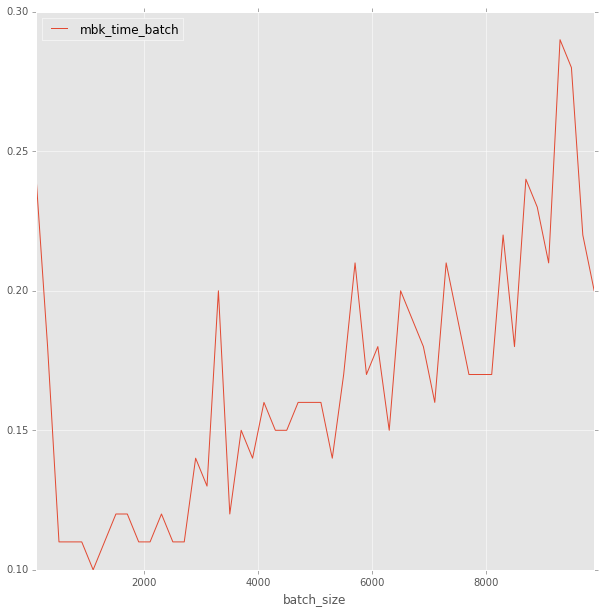

In [206]:
# plot optimal max batch size
mbk_batch_df = pd.DataFrame(mbk_means_batch)
mbk_batch_df.columns = ['batch_size', 'mbk_time_batch']
mbk_batch_df.plot(x = 'batch_size',y = 'mbk_time_batch')

In [207]:
# minimum batch around 3000
min_batch = mbk_batch_df['batch_size'][mbk_batch_df['mbk_time_batch']==mbk_batch_df['mbk_time_batch'].min()].values
print(min_batch)

[1100]


** apply clusters **

In [208]:
optimal_time, optimal_labels, optimal_centers, optimal_unique_labels = optimal_mbk_time(200,3000)

In [209]:
full_list = list(zip(optimal_labels, pair_coordinates, category_cluster))

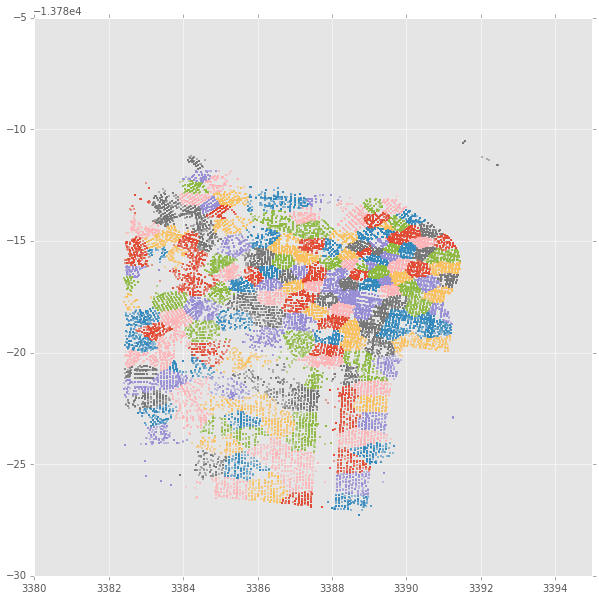

In [210]:
cluster_color = [item[0] for item in full_list ]
lat_mini = [item[1][0] for item in full_list]
long_mini = [item[1][1] for item in full_list]

# df = pandas.DataFrame(dict(lat_mini=lat_mini, long_mini=long_mini, cluster_color=cluster_color))

# #df = pandas.DataFrame(lat_mini=lat_mini, long_mini=long_mini, cluster_color=cluster_color)
# df.plot(kind='scatter', x='lat_mini', y='long_mini', color='DarkBlue')

df_clustering = pd.DataFrame(dict(lat_mini=lat_mini, long_mini=long_mini, cluster_color=cluster_color, category=category_cluster))

groups = df_clustering.groupby('cluster_color')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.lat_mini, group.long_mini, marker='.', linestyle='', ms=2, label=name)
#ax.legend()
plt.xlim(3380, 3395)
plt.ylim(-13810, -13785)
plt.show()

In [211]:
df_clustering.head()

,category,cluster_color,lat_mini,long_mini
0,ASSAULT,166,3386.833900,-13799.459307
1,LARCENY/THEFT,12,3391.177927,-13795.922983
2,LARCENY/THEFT,30,3387.229847,-13798.441416
3,LARCENY/THEFT,157,3389.994575,-13797.523729
4,DRUG/NARCOTIC,103,3389.097892,-13796.248818


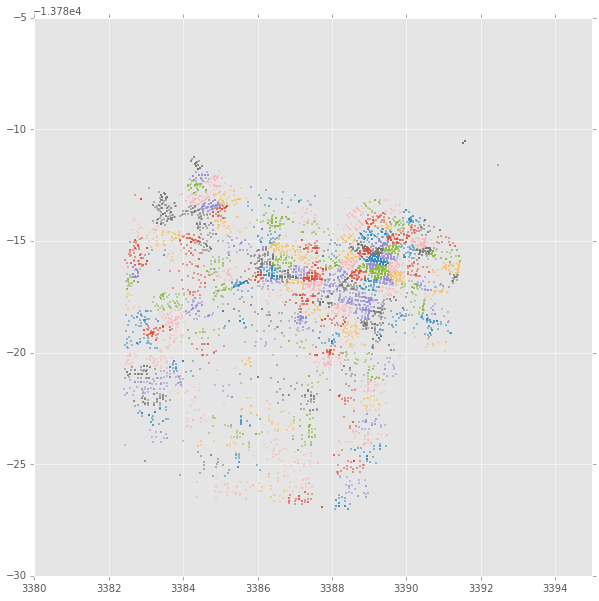

In [212]:
df_clustering2 = pd.DataFrame(dict(lat_mini=lat_mini, long_mini=long_mini, cluster_color=cluster_color, category=category_cluster))
df_clustering2 = df_clustering2[df_clustering2.category=="ASSAULT"]

groups2 = df_clustering2.groupby('cluster_color')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups2:
    ax.plot(group.lat_mini, group.long_mini, marker='.', linestyle='', ms=2, label=name)
#ax.legend()
plt.xlim(3380, 3395)
plt.ylim(-13810, -13785)
plt.show()

### use format_sfpd to start predicting

In [213]:
train_df_new.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month_of_year,...,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,dummy_Category
0,2003-04-02 13:00:00,ASSAULT,THREATS AGAINST LIFE,Wednesday,PARK,NONE,500 Block of CORBETT AV,-122.444182,37.757346,4,...,0,0,0,0,1,0,0,0,0,1
1,2011-12-15 16:15:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Thursday,CENTRAL,NONE,300 Block of BAY ST,-122.412804,37.805774,12,...,1,0,0,0,0,0,0,0,0,16
2,2015-03-04 01:55:00,LARCENY/THEFT,GRAND THEFT FROM PERSON,Wednesday,MISSION,NONE,400 Block of CASTRO ST,-122.435150,37.761760,3,...,0,0,1,0,0,0,0,0,0,16
3,2008-08-19 22:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,2000 Block of WASHINGTON ST,-122.427007,37.792582,8,...,0,0,0,1,0,0,0,0,0,16
4,2014-04-16 12:58:00,DRUG/NARCOTIC,SALE OF BASE/ROCK COCAINE,Wednesday,TENDERLOIN,"ARREST, BOOKED",TURK ST / HYDE ST,-122.415695,37.782585,4,...,0,0,0,0,0,0,0,0,1,7


## Train on smaller dataset

In [216]:
train_df_new.shape

(100000, 37)

In [34]:
#training_data = format_sfpd[:10000]

In [35]:
#training_data.shape

(10000, 31)

In [218]:
train_df_new.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'month_of_year', 'day_of_month',
       'hour_of_day', 'min_of_hour', 'WeekdayWeeekend', 'TimeOfDay', 'Season',
       'Weekday', 'Weekend', 'Afternoon', 'Midnight', 'Morning', 'Night',
       'Autumn', 'Spring', 'Summer', 'Winter', 'BAYVIEW', 'CENTRAL',
       'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN',
       'TARAVAL', 'TENDERLOIN', 'dummy_Category'],
      dtype='object')

In [219]:
# Lat/Long
X_feature = (True, 'X')
Y_feature = (True, 'Y')

# Time
#Month_feature = (False, 'month_of_year')
#Day_feature = (False, 'day_of_month')
#Hour_feature = (True, 'hour_of_day')
#Min_feature = (False, 'min_of_hour')

# Day of Week
#Friday_feature = (True, 'Friday') 
#Monday_feature = (True, 'Monday')
#Saturday_feature = (True, 'Saturday')
#Sunday_feature = (True, 'Sunday')
#Thursday_feature = (True, 'Thursday')
#Tuesday_feature = (True, 'Tuesday')
#Wednesday_feature = (True, 'Wednesday')

#Weekday/Weekend
Weekday_feature = (True, 'Weekday') 
Weekend_feature = (True, 'Weekend') 

#Season 
Autumn_feature = (True, 'Autumn') 
Spring_feature = (True, 'Spring') 
Summer_feature = (True, 'Summer') 
Winter_feature = (True, 'Winter') 

#Time of Day
Midnight_feature = (True, 'Midnight') 
Morning_feature = (True, 'Morning') 
Afternoon_feature = (True, 'Afternoon') 
Night_feature = (True, 'Night') 

# District
BAYV_feature = (True, 'BAYVIEW')
CENT_feature = (True, 'CENTRAL')
INGL_feature = (True, 'INGLESIDE')
MISS_feature = (True, 'MISSION')
NORT_feature = (True, 'NORTHERN')
PARK_feature = (True, 'PARK')
RICH_feature = (True, 'RICHMOND')
SOUT_feature = (True, 'SOUTHERN')
TARA_feature = (True, 'TARAVAL')
TEND_feature = (True, 'TENDERLOIN')

In [221]:
#feature_list = [X_feature, Y_feature, Monday_feature, Day_feature, Hour_feature, Min_feature,
#               Friday_feature, Monday_feature, Saturday_feature, Sunday_feature, Thursday_feature,
#               Tuesday_feature, Wednesday_feature, BAYV_feature, CENT_feature, INGL_feature,
#               MISS_feature, NORT_feature, PARK_feature, RICH_feature, SOUT_feature, TARA_feature, 
#               TEND_feature]

feature_list = [X_feature, Y_feature, Weekday_feature, Weekend_feature, Autumn_feature, Spring_feature,
               Summer_feature, Winter_feature, Midnight_feature, Morning_feature, Afternoon_feature,
               Night_feature, BAYV_feature, CENT_feature, INGL_feature,
               MISS_feature, NORT_feature, PARK_feature, RICH_feature, SOUT_feature, TARA_feature, 
               TEND_feature]

features = [str(x[1]) for x in feature_list if x[0]]
features

['X',
 'Y',
 'Weekday',
 'Weekend',
 'Autumn',
 'Spring',
 'Summer',
 'Winter',
 'Midnight',
 'Morning',
 'Afternoon',
 'Night',
 'BAYVIEW',
 'CENTRAL',
 'INGLESIDE',
 'MISSION',
 'NORTHERN',
 'PARK',
 'RICHMOND',
 'SOUTHERN',
 'TARAVAL',
 'TENDERLOIN']

In [39]:
# features = ['X', 'Y', 'month_of_year', 'day_of_month',
#             'hour_of_day', 'min_of_hour', 'Friday', 'Monday', 'Saturday', 'Sunday',
#             'Thursday', 'Tuesday', 'Wednesday']

## SVM

**1) svm with single fold**

In [223]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(
    train_df_new[features], train_df_new['dummy_Category'], test_size=0.2, random_state=0)

In [224]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 22)
(20000, 22)
(80000,)
(20000,)


In [225]:
#KNN - gives lowest error; does well with tons of data; ratio does not go to infiniti; data, ratio, (30 max)
# extra features on day: holiday; weekend; weekday; time of year; but do exploratory analyssi to find best features
# randomforest and decision tree will tell you the importance of feature
# 2D kernel density estimation

svc_model = svm.SVC(kernel = 'rbf', C=10.0).fit(x_train, y_train)

svc_model.score(x_test, y_test) 

0.23005

**2) svm with crossfolds**

In [43]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8000, 21) (8000,)
(2000, 21) (2000,)


In [ ]:
print(training_data[features].shape)
print(training_data['dummy_Category'].shape)

(10000, 21)
(10000,)


In [ ]:
svm_2 = svm.SVC(kernel = 'rbf', C=90.0)
scores = cross_validation.cross_val_score(
    svm_2, training_data[features], training_data['dummy_Category'], cv=5)
scores

In [45]:
SVM_tuned_parameters = [{'kernel': ['rbf'],
                     'gamma': [1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 10, 50, 100, 500, 1000]}
                   ]

SVM_scores = ['precision', 'recall']

In [46]:
print(SVM_tuned_parameters)
print(SVM_scores)

[{'gamma': [0.1, 0.01, 0.001, 0.0001], 'C': [1, 10, 50, 100, 500, 1000], 'kernel': ['rbf']}]
['precision', 'recall']


In [49]:
for score in SVM_scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(C=1), SVM_tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

/Users/carlo_liquido/anaconda/lib/python3.4/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
/Users/carlo_liquido/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/carlo_liquido/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/carlo_liquido/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precis

# Tuning hyper-parameters for precision



KeyboardInterrupt: 